In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

fruits = pd.read_table('fruit_data_with_colors.txt')

In [2]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
#create a mapping from fruit label to fruit name to make results easier to interpret
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [4]:
#Create train-test split

In [8]:
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [9]:
#Examining the data

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  import sys


<IPython.core.display.Javascript object>


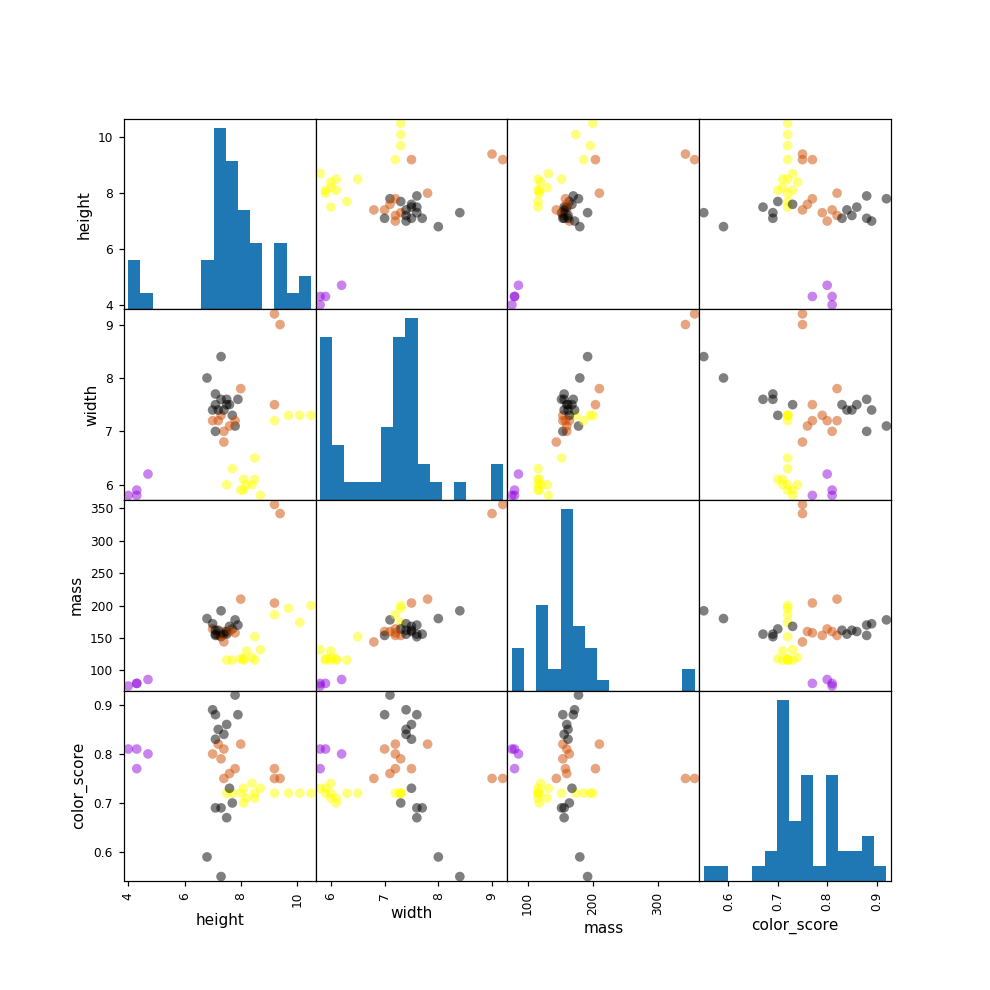

In [11]:
#plotting a scatter matrix
from matplotlib import cm
X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(X_train, c=y_train, marker='o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

<IPython.core.display.Javascript object>


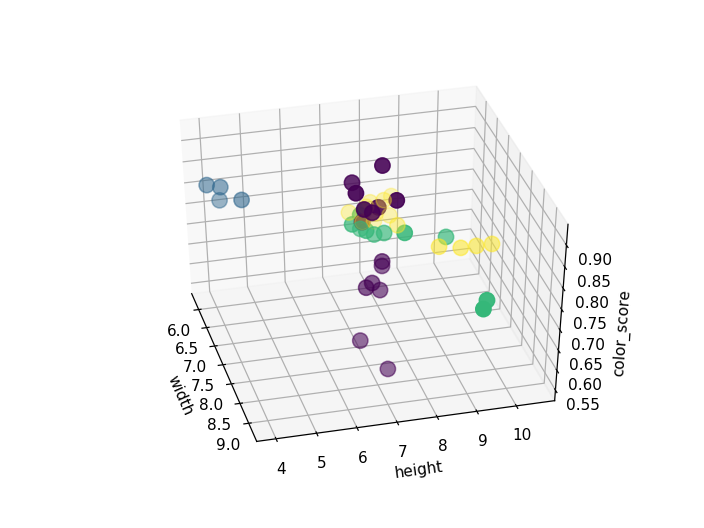

Text(0.5, 0, 'color_score')

In [12]:
#plotting a 3d scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
ax=fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c=y_train, marker='o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')

In [13]:
#Create train_test split

In [16]:
#For this example, we use the mass, width and height features of each fruit instance
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

#default is 75% / 25% train_test split
X_train, X_test, y_test, y_train = train_test_split(X, y, random_state=0)

In [15]:
#Create classifier object

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [19]:
#Train the classifier fit the estimator using the training data

In [21]:
#For this example, we use the mass, width and height features of each fruit instance
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

#default is 75% / 25% train_test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [23]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [24]:
knn.score(X_test, y_test)

0.5333333333333333

In [25]:
#let's use the trained classifier model to classify new, previously unseen objects

In [27]:
fruit_prediction = knn.predict([[18, 5, 4.3]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [28]:
fruit_prediction = knn.predict([[25, 8, 5.5]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [29]:
fruit_prediction = knn.predict([[15, 8, 5.5]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [31]:
fruit_prediction = knn.predict([[45, 15, 20]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [32]:
fruit_prediction = knn.predict([[75, 25, 25]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [33]:
fruit_prediction = knn.predict([[125, 65, 70]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

In [34]:
fruit_prediction = knn.predict([[200, 125, 145]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

In [35]:
fruit_prediction = knn.predict([[400, 500, 600]])
lookup_fruit_name[fruit_prediction[0]]

'orange'

<IPython.core.display.Javascript object>


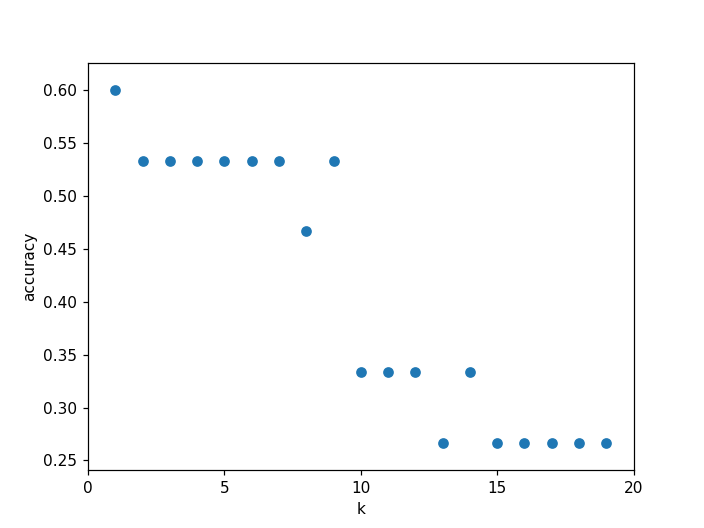

([<matplotlib.axis.XTick at 0x13e311cb4a8>,
 <a list of 5 Text xticklabel objects>)

In [38]:
k_range = range(1, 20)
scores=[]

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
    
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0, 5, 10, 15, 20])

In [39]:
#How sensitive is k-NN classification accuracy to the train/test split proportion

<IPython.core.display.Javascript object>


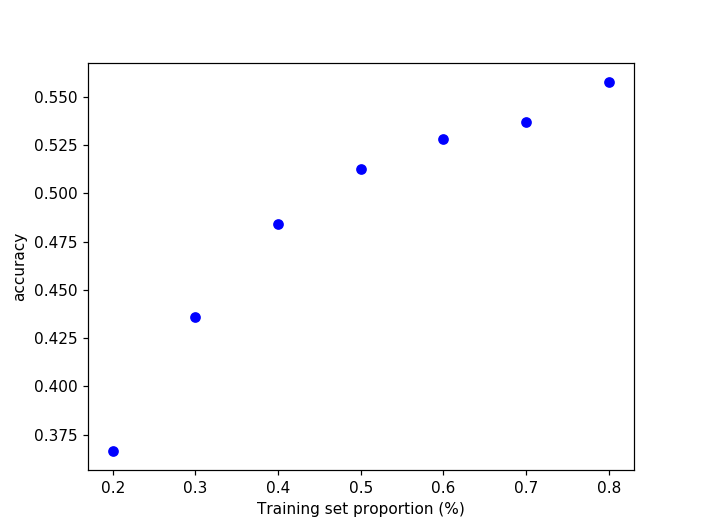

Text(0, 0.5, 'accuracy')

In [40]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:
    scores = []
    for i in range(1, 1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')
plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy')